In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
def check_outlier(column, dataset):
    q1 = np.quantile(dataset[column].values, .25)
    q3 = np.quantile(dataset[column].values, .75)
    iqr = q3-q1

    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr

    is_outlier_list = []

    for value in dataset[column].values:
        
        if value <=high and value>=low:
            is_outlier_list.append(0)
        else:
            is_outlier_list.append(1)
    
    return is_outlier_list

In [3]:
df_data = pd.read_csv("../results/1_check_raw_data.csv")
df_data = df_data.drop(columns=["height mt", "imc"])
df_data

,sex,age,t2m_pre_sdnn,bp_systolic,bp_diastolic,bp_pam,bp_pp,weight kg,height cm,check_height,check_imc,imc_2
0,1.0,75.0,308.0,108,70,82.667,38,70.0,160,1,1,27.344
1,1.0,66.0,255.0,122,72,88.667,50,52.0,149,1,1,23.422
2,2.0,77.0,147.0,125,85,98.333,40,81.0,170,1,1,28.028
3,1.0,77.0,170.0,126,72,90.000,54,85.0,160,1,1,33.203
4,1.0,73.0,176.0,130,80,96.667,50,69.0,151,1,1,30.262
...,...,...,...,...,...,...,...,...,...,...,...,...
516,1.0,80.0,6.5,152,82,105.333,70,80.9,167,1,1,29.008
517,2.0,67.0,20.0,134,87,102.667,47,68.1,154,1,1,28.715
518,2.0,77.0,26.7,141,80,100.333,61,67.1,152,1,1,29.043
519,2.0,61.0,22.4,106,58,74.000,48,58.4,162,1,1,22.253


In [4]:
df_data.dropna().shape

(510, 12)

In [5]:
df_data["sex"].isna().value_counts()

sex
False    521
Name: count, dtype: int64

In [6]:
matrix_summary = []

for column in df_data.columns:

    value_counts = df_data[column].isna().value_counts()

    row = [column, 0, 0]

    if True in value_counts.index:
        row[1] = value_counts[True]
    
    if False in value_counts.index:
        row[2] = value_counts[False]
    
    matrix_summary.append(row)

df_summary_null = pd.DataFrame(data=matrix_summary, columns=["feature", "null", "not-null"])
df_summary_null.sort_values(by="null", ascending=False)
    

,feature,null,not-null
2,t2m_pre_sdnn,11,510
0,sex,0,521
1,age,0,521
3,bp_systolic,0,521
4,bp_diastolic,0,521
5,bp_pam,0,521
6,bp_pp,0,521
7,weight kg,0,521
8,height cm,0,521
9,check_height,0,521


In [7]:
df_data_not_null = df_data.dropna()
df_data_not_null

,sex,age,t2m_pre_sdnn,bp_systolic,bp_diastolic,bp_pam,bp_pp,weight kg,height cm,check_height,check_imc,imc_2
0,1.0,75.0,308.0,108,70,82.667,38,70.0,160,1,1,27.344
1,1.0,66.0,255.0,122,72,88.667,50,52.0,149,1,1,23.422
2,2.0,77.0,147.0,125,85,98.333,40,81.0,170,1,1,28.028
3,1.0,77.0,170.0,126,72,90.000,54,85.0,160,1,1,33.203
4,1.0,73.0,176.0,130,80,96.667,50,69.0,151,1,1,30.262
...,...,...,...,...,...,...,...,...,...,...,...,...
516,1.0,80.0,6.5,152,82,105.333,70,80.9,167,1,1,29.008
517,2.0,67.0,20.0,134,87,102.667,47,68.1,154,1,1,28.715
518,2.0,77.0,26.7,141,80,100.333,61,67.1,152,1,1,29.043
519,2.0,61.0,22.4,106,58,74.000,48,58.4,162,1,1,22.253


<Axes: xlabel='t2m_pre_sdnn'>

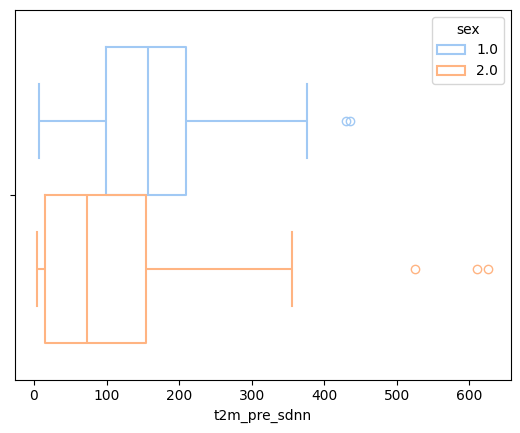

In [8]:
sns.boxplot(data=df_data_not_null, x="t2m_pre_sdnn", hue="sex", palette="pastel", fill=False)

<Axes: xlabel='t2m_pre_sdnn', ylabel='Count'>

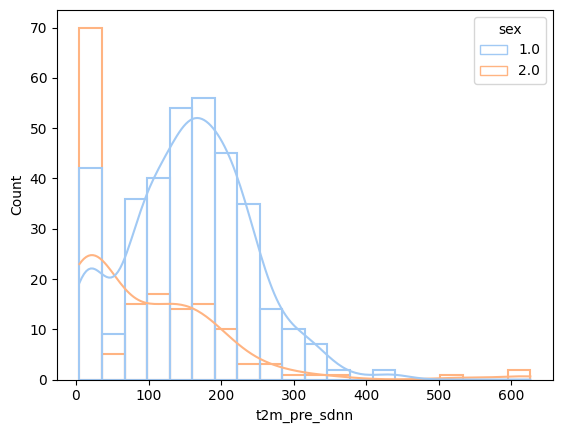

In [9]:
sns.histplot(data=df_data_not_null, x="t2m_pre_sdnn", hue="sex", palette="pastel", kde=True, fill=False)

In [10]:
df_data_not_null.columns

Index(['sex', 'age', 't2m_pre_sdnn', 'bp_systolic', 'bp_diastolic', 'bp_pam',
       'bp_pp', 'weight kg', 'height cm', 'check_height', 'check_imc',
       'imc_2'],
      dtype='object')

In [11]:
df_data_not_null = df_data_not_null.reset_index()
df_data_not_null

,index,sex,age,t2m_pre_sdnn,bp_systolic,bp_diastolic,bp_pam,bp_pp,weight kg,height cm,check_height,check_imc,imc_2
0,0,1.0,75.0,308.0,108,70,82.667,38,70.0,160,1,1,27.344
1,1,1.0,66.0,255.0,122,72,88.667,50,52.0,149,1,1,23.422
2,2,2.0,77.0,147.0,125,85,98.333,40,81.0,170,1,1,28.028
3,3,1.0,77.0,170.0,126,72,90.000,54,85.0,160,1,1,33.203
4,4,1.0,73.0,176.0,130,80,96.667,50,69.0,151,1,1,30.262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,516,1.0,80.0,6.5,152,82,105.333,70,80.9,167,1,1,29.008
506,517,2.0,67.0,20.0,134,87,102.667,47,68.1,154,1,1,28.715
507,518,2.0,77.0,26.7,141,80,100.333,61,67.1,152,1,1,29.043
508,519,2.0,61.0,22.4,106,58,74.000,48,58.4,162,1,1,22.253


In [12]:
df_data_not_null.drop(columns=["index"], inplace=True)

In [13]:
df_outliers = pd.DataFrame()

for column in df_data_not_null.columns:
    if column != 'sex':
        df_outliers[f"{column}_outlier"] = check_outlier(column, df_data_not_null)

df_concat = pd.concat([df_data_not_null, df_outliers], axis=1)
df_concat

,sex,age,t2m_pre_sdnn,bp_systolic,bp_diastolic,bp_pam,bp_pp,weight kg,height cm,check_height,...,t2m_pre_sdnn_outlier,bp_systolic_outlier,bp_diastolic_outlier,bp_pam_outlier,bp_pp_outlier,weight kg_outlier,height cm_outlier,check_height_outlier,check_imc_outlier,imc_2_outlier
0,1.0,75.0,308.0,108,70,82.667,38,70.0,160,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,66.0,255.0,122,72,88.667,50,52.0,149,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,77.0,147.0,125,85,98.333,40,81.0,170,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,77.0,170.0,126,72,90.000,54,85.0,160,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,73.0,176.0,130,80,96.667,50,69.0,151,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1.0,80.0,6.5,152,82,105.333,70,80.9,167,1,...,0,0,0,0,0,0,0,0,0,0
506,2.0,67.0,20.0,134,87,102.667,47,68.1,154,1,...,0,0,0,0,0,0,0,0,0,0
507,2.0,77.0,26.7,141,80,100.333,61,67.1,152,1,...,0,0,0,0,0,0,0,0,0,0
508,2.0,61.0,22.4,106,58,74.000,48,58.4,162,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_concat["bp_diastolic_outlier"].value_counts()

bp_diastolic_outlier
0    505
1      5
Name: count, dtype: int64

In [15]:
df_concat

,sex,age,t2m_pre_sdnn,bp_systolic,bp_diastolic,bp_pam,bp_pp,weight kg,height cm,check_height,...,t2m_pre_sdnn_outlier,bp_systolic_outlier,bp_diastolic_outlier,bp_pam_outlier,bp_pp_outlier,weight kg_outlier,height cm_outlier,check_height_outlier,check_imc_outlier,imc_2_outlier
0,1.0,75.0,308.0,108,70,82.667,38,70.0,160,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,66.0,255.0,122,72,88.667,50,52.0,149,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,77.0,147.0,125,85,98.333,40,81.0,170,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,77.0,170.0,126,72,90.000,54,85.0,160,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,73.0,176.0,130,80,96.667,50,69.0,151,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1.0,80.0,6.5,152,82,105.333,70,80.9,167,1,...,0,0,0,0,0,0,0,0,0,0
506,2.0,67.0,20.0,134,87,102.667,47,68.1,154,1,...,0,0,0,0,0,0,0,0,0,0
507,2.0,77.0,26.7,141,80,100.333,61,67.1,152,1,...,0,0,0,0,0,0,0,0,0,0
508,2.0,61.0,22.4,106,58,74.000,48,58.4,162,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
matrix_summary = []

for column in df_concat.columns:

    if "outlier" in column:
        value_counts = df_concat[column].value_counts()

        row = [column, 0, 0]

        if 1 in value_counts.index:
            row[1] = int(value_counts[1])
        
        if 0 in value_counts.index:
            row[2] = int(value_counts[0])
        
        matrix_summary.append(row)

df_summary_outlier = pd.DataFrame(data=matrix_summary, columns=["feature", "outlier", "not-outlier"])
df_summary_outlier.sort_values(by="outlier", ascending=False)

,feature,outlier,not-outlier
6,weight kg_outlier,17,493
7,height cm_outlier,11,499
2,bp_systolic_outlier,8,502
10,imc_2_outlier,8,502
4,bp_pam_outlier,7,503
5,bp_pp_outlier,6,504
1,t2m_pre_sdnn_outlier,5,505
3,bp_diastolic_outlier,5,505
0,age_outlier,4,506
9,check_imc_outlier,3,507


In [17]:
df_concat[df_concat["height cm_outlier"] == 1]

,sex,age,t2m_pre_sdnn,bp_systolic,bp_diastolic,bp_pam,bp_pp,weight kg,height cm,check_height,...,t2m_pre_sdnn_outlier,bp_systolic_outlier,bp_diastolic_outlier,bp_pam_outlier,bp_pp_outlier,weight kg_outlier,height cm_outlier,check_height_outlier,check_imc_outlier,imc_2_outlier
72,2.0,66.0,159.0,142,92,108.667,50,94.0,178,1,...,0,0,0,0,0,0,1,0,0,0
90,1.0,69.0,232.0,123,82,95.667,41,95.0,178,1,...,0,0,0,0,0,0,1,0,0,0
152,2.0,76.0,129.0,125,72,89.667,53,65.0,130,1,...,0,0,0,0,0,0,1,0,0,0
164,1.0,75.0,79.0,121,73,89.000,48,80.0,180,1,...,0,0,0,0,0,0,1,0,0,0
177,2.0,69.0,72.0,137,85,102.333,52,72.0,178,1,...,0,0,0,0,0,0,1,0,0,0
262,1.0,67.0,217.0,140,92,108.000,48,65.0,130,1,...,0,0,0,0,0,0,1,0,0,0
272,2.0,70.0,136.0,112,69,83.333,43,80.5,180,1,...,0,0,0,0,0,0,1,0,0,0
285,2.0,79.0,18.0,149,87,107.667,62,71.5,178,1,...,0,0,0,0,0,0,1,0,0,0
342,1.0,68.0,203.0,134,74,94.000,60,68.0,130,1,...,0,0,0,0,0,0,1,0,0,0
394,2.0,62.0,204.0,148,105,119.333,43,118.0,178,1,...,0,0,1,0,0,1,1,0,0,0


In [18]:
df_outliers["is_outlier"] = df_outliers.sum(numeric_only=True, axis=1)
df_outliers

,age_outlier,t2m_pre_sdnn_outlier,bp_systolic_outlier,bp_diastolic_outlier,bp_pam_outlier,bp_pp_outlier,weight kg_outlier,height cm_outlier,check_height_outlier,check_imc_outlier,imc_2_outlier,is_outlier
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
505,0,0,0,0,0,0,0,0,0,0,0,0
506,0,0,0,0,0,0,0,0,0,0,0,0
507,0,0,0,0,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df_outliers["is_outlier"].value_counts()

is_outlier
0    453
1     44
2      9
3      4
Name: count, dtype: int64

In [20]:
response = df_data_not_null["t2m_pre_sdnn"]

df_data_not_null = df_data_not_null.drop(columns=["check_height", "check_imc", "t2m_pre_sdnn"])
df_data_not_null

,sex,age,bp_systolic,bp_diastolic,bp_pam,bp_pp,weight kg,height cm,imc_2
0,1.0,75.0,108,70,82.667,38,70.0,160,27.344
1,1.0,66.0,122,72,88.667,50,52.0,149,23.422
2,2.0,77.0,125,85,98.333,40,81.0,170,28.028
3,1.0,77.0,126,72,90.000,54,85.0,160,33.203
4,1.0,73.0,130,80,96.667,50,69.0,151,30.262
...,...,...,...,...,...,...,...,...,...
505,1.0,80.0,152,82,105.333,70,80.9,167,29.008
506,2.0,67.0,134,87,102.667,47,68.1,154,28.715
507,2.0,77.0,141,80,100.333,61,67.1,152,29.043
508,2.0,61.0,106,58,74.000,48,58.4,162,22.253


In [23]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [22]:
isolation_forest = IsolationForest()
isolation_forest.fit(df_data_not_null)

df_data_not_null["is_isolated"] = isolation_forest.predict(df_data_not_null)
df_data_not_null["is_isolated"].value_counts()

is_isolated
 1    430
-1     80
Name: count, dtype: int64

In [25]:
local_outlier_factor = LocalOutlierFactor()

df_data_not_null["is_lof"] = local_outlier_factor.fit_predict(df_data_not_null)
df_data_not_null["is_lof"].value_counts()

is_lof
 1    501
-1      9
Name: count, dtype: int64

In [26]:
df_data_not_null.groupby(["is_isolated", "is_lof"]).count()

sex  age  bp_systolic  bp_diastolic  bp_pam  bp_pp  \
is_isolated is_lof                                                       
-1          -1        9    9            9             9       9      9   
             1       71   71           71            71      71     71   
 1           1      430  430          430           430     430    430   

                    weight kg  height cm  imc_2  
is_isolated is_lof                               
-1          -1              9          9      9  
             1             71         71     71  
 1           1            430        430    430

In [27]:
df_data_not_null["response"] =response

In [28]:
df_data_not_null.to_csv("../results/2_check_outliers.csv", index=False)